# Healthcare Project - Drug Persistence

In this project we explore a dataset which has information on patients and the persistency of a drug. 
The goal is to understand which factors impact the persistance of a drug

### Data intake

In [34]:
## Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [3]:
df_drug = pd.read_excel("Healthcare_dataset.xlsx",'Dataset')


In [4]:
df_drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [5]:
#Let's remove the first character from the ID column for easier usage

df_drug['Ptid'] = df_drug['Ptid'].str[1:]

We can see above that there are no missing values in the dataset.

## Random Forest Classification

The first classification model we will use is SkLearn's random forest classifier. Random forest classifiers can be helpful because they use decision trees but can have less variance than a basic decision trees. It uses bootstrapping and aggregating (bagging) to build a random forest and predict the target variable. 

First we'll split the data into training and testing sets.

In [6]:
# Split into X and Y
drug_y = df_drug["Persistency_Flag"]
drug_x = df_drug.drop("Persistency_Flag",axis=1)
drug_x = df_drug.drop("Ptid",axis=1)
drug_x=df_drug.drop("Gender",axis=1) #Trying to see if dropping genderhelps

features = drug_x.columns

# Encode the columns
x_factorized = pd.DataFrame()
for feature in features:
    x_factorized[feature] = pd.factorize(drug_x[feature])[0]

drug_y = pd.DataFrame(pd.factorize(drug_y)[0])
drug_x = x_factorized
drug_y = np.ravel(drug_y)

In [7]:
drug_x = drug_x.drop("Persistency_Flag",axis=1)
drug_x.head()

,Ptid,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,1,1,2,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,3,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
4,4,0,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,2


In [8]:
#Train and test
X_train, X_test, y_train, y_test = train_test_split(drug_x,drug_y,test_size=0.3,random_state=42)


In [9]:
#Create classifier object
clf = RandomForestClassifier(n_estimators=100)

# Train the model
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [10]:
# Now let's test accuracy of the random forest classifier
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.8083657587548638


In [11]:
cv = StratifiedKFold(shuffle=True, random_state=42)
cross_val_score(clf, drug_x, drug_y, cv=cv)

array([0.82189781, 0.78686131, 0.82335766, 0.80875912, 0.81578947])

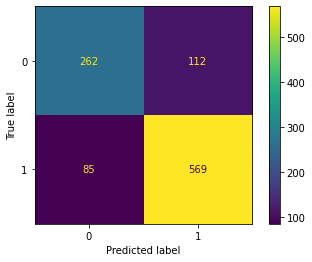

In [12]:
conf_mat = metrics.confusion_matrix(y_test,y_pred)
disp=metrics.ConfusionMatrixDisplay(conf_mat)
disp.plot()

In [13]:
# Gridsearch
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
params = {'n_estimators': np.arange(400, 401),
          'max_features': np.arange(3, 6),
          'max_leaf_nodes': np.arange(60, 81, 10),
          'max_depth': np.arange(8, 10)}
gs = GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                  param_grid=params, cv=cv, n_jobs=-1, refit=True)
gs.fit(drug_x, drug_y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': array([8, 9]),
                         'max_features': array([3, 4, 5]),
                         'max_leaf_nodes': array([60, 70, 80]),
                         'n_estimators': array([400])})

## Feature Analysis and  Parameter Tuning

Below we look at the features that affect the random forest model the most. We then experiment with 

In [14]:
rfc = gs.best_estimator_
feat_imp = pd.DataFrame({'Feature': drug_x.columns, 'Importance': rfc.feature_importances_})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)
feat_imp

,Feature,Importance
10,Dexa_Freq_During_Rx,0.160974
11,Dexa_During_Rx,0.133175
29,Comorb_Long_Term_Current_Drug_Therapy,0.069657
23,Comorb_Encounter_For_Screening_For_Malignant_N...,0.058682
24,Comorb_Encounter_For_Immunization,0.048572
...,...,...
64,Risk_Immobilization,0.000463
52,Risk_Untreated_Early_Menopause,0.000177
63,Risk_Estrogen_Deficiency,0.000099
50,Risk_Untreated_Chronic_Hyperthyroidism,0.000052


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

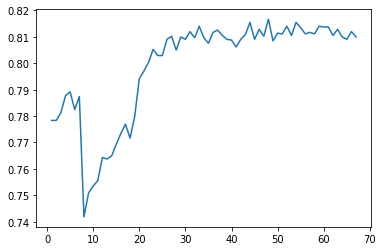

In [15]:
n_feats = np.arange(1, 68)
scores = np.ndarray(67)
clf = RandomForestClassifier(n_jobs=-1, n_estimators=100, random_state=42)
for i, feats_in in enumerate(n_feats):
    subset = drug_x[feat_imp.iloc[0:feats_in, 0].values.tolist()]
    scores[i] = np.mean(cross_val_score(clf, subset, drug_y, cv=cv))

sns.lineplot(n_feats, scores)

In [16]:
pd.DataFrame(gs.cv_results_, columns=gs.cv_results_.keys()).sort_values(by='mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_leaf_nodes,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.636863,0.056622,0.070524,0.012530,8,4,70,400,"{'max_depth': 8, 'max_features': 4, 'max_leaf_...",0.814599,0.795620,0.823358,0.80438,0.804094,0.808410,0.009594,1
5,0.625980,0.084236,0.049121,0.009889,8,4,80,400,"{'max_depth': 8, 'max_features': 4, 'max_leaf_...",0.816058,0.791241,0.823358,0.79854,0.807018,0.807243,0.011569,2
3,0.611157,0.048828,0.060786,0.026058,8,4,60,400,"{'max_depth': 8, 'max_features': 4, 'max_leaf_...",0.811679,0.791241,0.826277,0.80292,0.804094,0.807242,0.011547,3
14,0.618293,0.035779,0.048783,0.018092,9,4,80,400,"{'max_depth': 9, 'max_features': 4, 'max_leaf_...",0.805839,0.789781,0.827737,0.80146,0.805556,0.806075,0.012299,4
12,0.652671,0.040042,0.049506,0.005224,9,4,60,400,"{'max_depth': 9, 'max_features': 4, 'max_leaf_...",0.804380,0.789781,0.826277,0.80000,0.808480,0.805783,0.011990,5


## Second Method: K-Nearest Neighbor

Here we explore a different algorithm from SKLearn, which is a K-Nearest neighbor algorithm. 

In [33]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))


Accuracy:  0.6896887159533074


Using a K-Nearest Neighbor algorithm for our model yielded approximately 69% accuracy, meaning the model correctly predicted the test class for 69% of the test set.

## Third Method: Gaussian Naive Bayes

Here we explore a third algorithm which is also from SkLearn, the Gaussian Naive Bayes Classifier.

In [35]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.7675097276264592


Using the base parameters with the Gaussian Naive Bayes Classifier, our model yielded an accuracy of about 77%. This is slightly less accurate than the Random Forest Classifier, but it is still significantly better than the K-Nearest Neighbors classifier.

## Final Recommendation

We would like to proceed with the model created using Random Forest Classification, as it performed the best. We were able to correctly predict the persistence of patients in the test set approximately 83% of the time. We hope ABC Pharma can use this model to help reach out to new potential customers by allowing them to have a prediction on whether or not a patient will take one of their medications for the full course. This would surely help them in reaching the most persistent customers and therefore increasing their profit per patient. 